In [128]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib notebook
import os

In [129]:
us_accidents_df = pd.read_csv("/Users/kelbywilson/Desktop/US_Accidents_Dec19.csv", encoding='utf8')

In [130]:
us_accidents_df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [131]:
us_accidents_df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [132]:
weather_data = us_accidents_df[["ID","Severity","Distance(mi)", "Wind_Chill(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Direction", "Wind_Speed(mph)", "Precipitation(in)", "Weather_Condition", "Temperature(F)"]]
weather_data.dropna()


,ID,Severity,Distance(mi),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Temperature(F)
5,A-6,3,0.010,35.5,97.0,29.63,7.0,SSW,3.5,0.03,Light Rain,37.9
9,A-10,3,0.010,33.8,100.0,29.62,3.0,SSW,4.6,0.02,Light Rain,37.4
11,A-12,3,0.010,33.8,100.0,29.62,3.0,SSW,4.6,0.02,Light Rain,37.4
14,A-15,2,0.010,33.8,100.0,29.62,3.0,SSW,4.6,0.02,Light Rain,37.4
20,A-21,2,0.000,29.6,100.0,29.62,2.0,NNW,4.6,0.01,Light Snow,33.8
...,...,...,...,...,...,...,...,...,...,...,...,...
2974330,A-2974354,2,0.543,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,86.0
2974331,A-2974355,2,0.338,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,70.0
2974332,A-2974356,2,0.561,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,73.0
2974333,A-2974357,2,0.772,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,71.0


In [133]:
replacements = {'Temperature(F)': 0.0}
weather_data.dropna()

,ID,Severity,Distance(mi),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Temperature(F)
5,A-6,3,0.010,35.5,97.0,29.63,7.0,SSW,3.5,0.03,Light Rain,37.9
9,A-10,3,0.010,33.8,100.0,29.62,3.0,SSW,4.6,0.02,Light Rain,37.4
11,A-12,3,0.010,33.8,100.0,29.62,3.0,SSW,4.6,0.02,Light Rain,37.4
14,A-15,2,0.010,33.8,100.0,29.62,3.0,SSW,4.6,0.02,Light Rain,37.4
20,A-21,2,0.000,29.6,100.0,29.62,2.0,NNW,4.6,0.01,Light Snow,33.8
...,...,...,...,...,...,...,...,...,...,...,...,...
2974330,A-2974354,2,0.543,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,86.0
2974331,A-2974355,2,0.338,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,70.0
2974332,A-2974356,2,0.561,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,73.0
2974333,A-2974357,2,0.772,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,71.0


In [134]:
# Hypothesis- The wind chill will affect the severity of the traffic caused by the accidents.
# Null Hypothesis- The wind chill will not affect the severity of the traffic caused by the accidents.
# Hypothesis- The temperature will affect the severity of the accidents.
# Null Hypothesis- The temperature will not affect the severity of the traffic caused by the accidents.

In [135]:
weather_data = pd.DataFrame(weather_data.groupby(["Severity"]).count()).reset_index()
wind_chill = weather_data[["Severity","Wind_Chill(F)"]]
wind_chill = wind_chill.set_index("Severity")
wind_chill

,Wind_Chill(F)
Severity,
1,260
2,783266
3,299756
4,38430


<IPython.core.display.Javascript object>


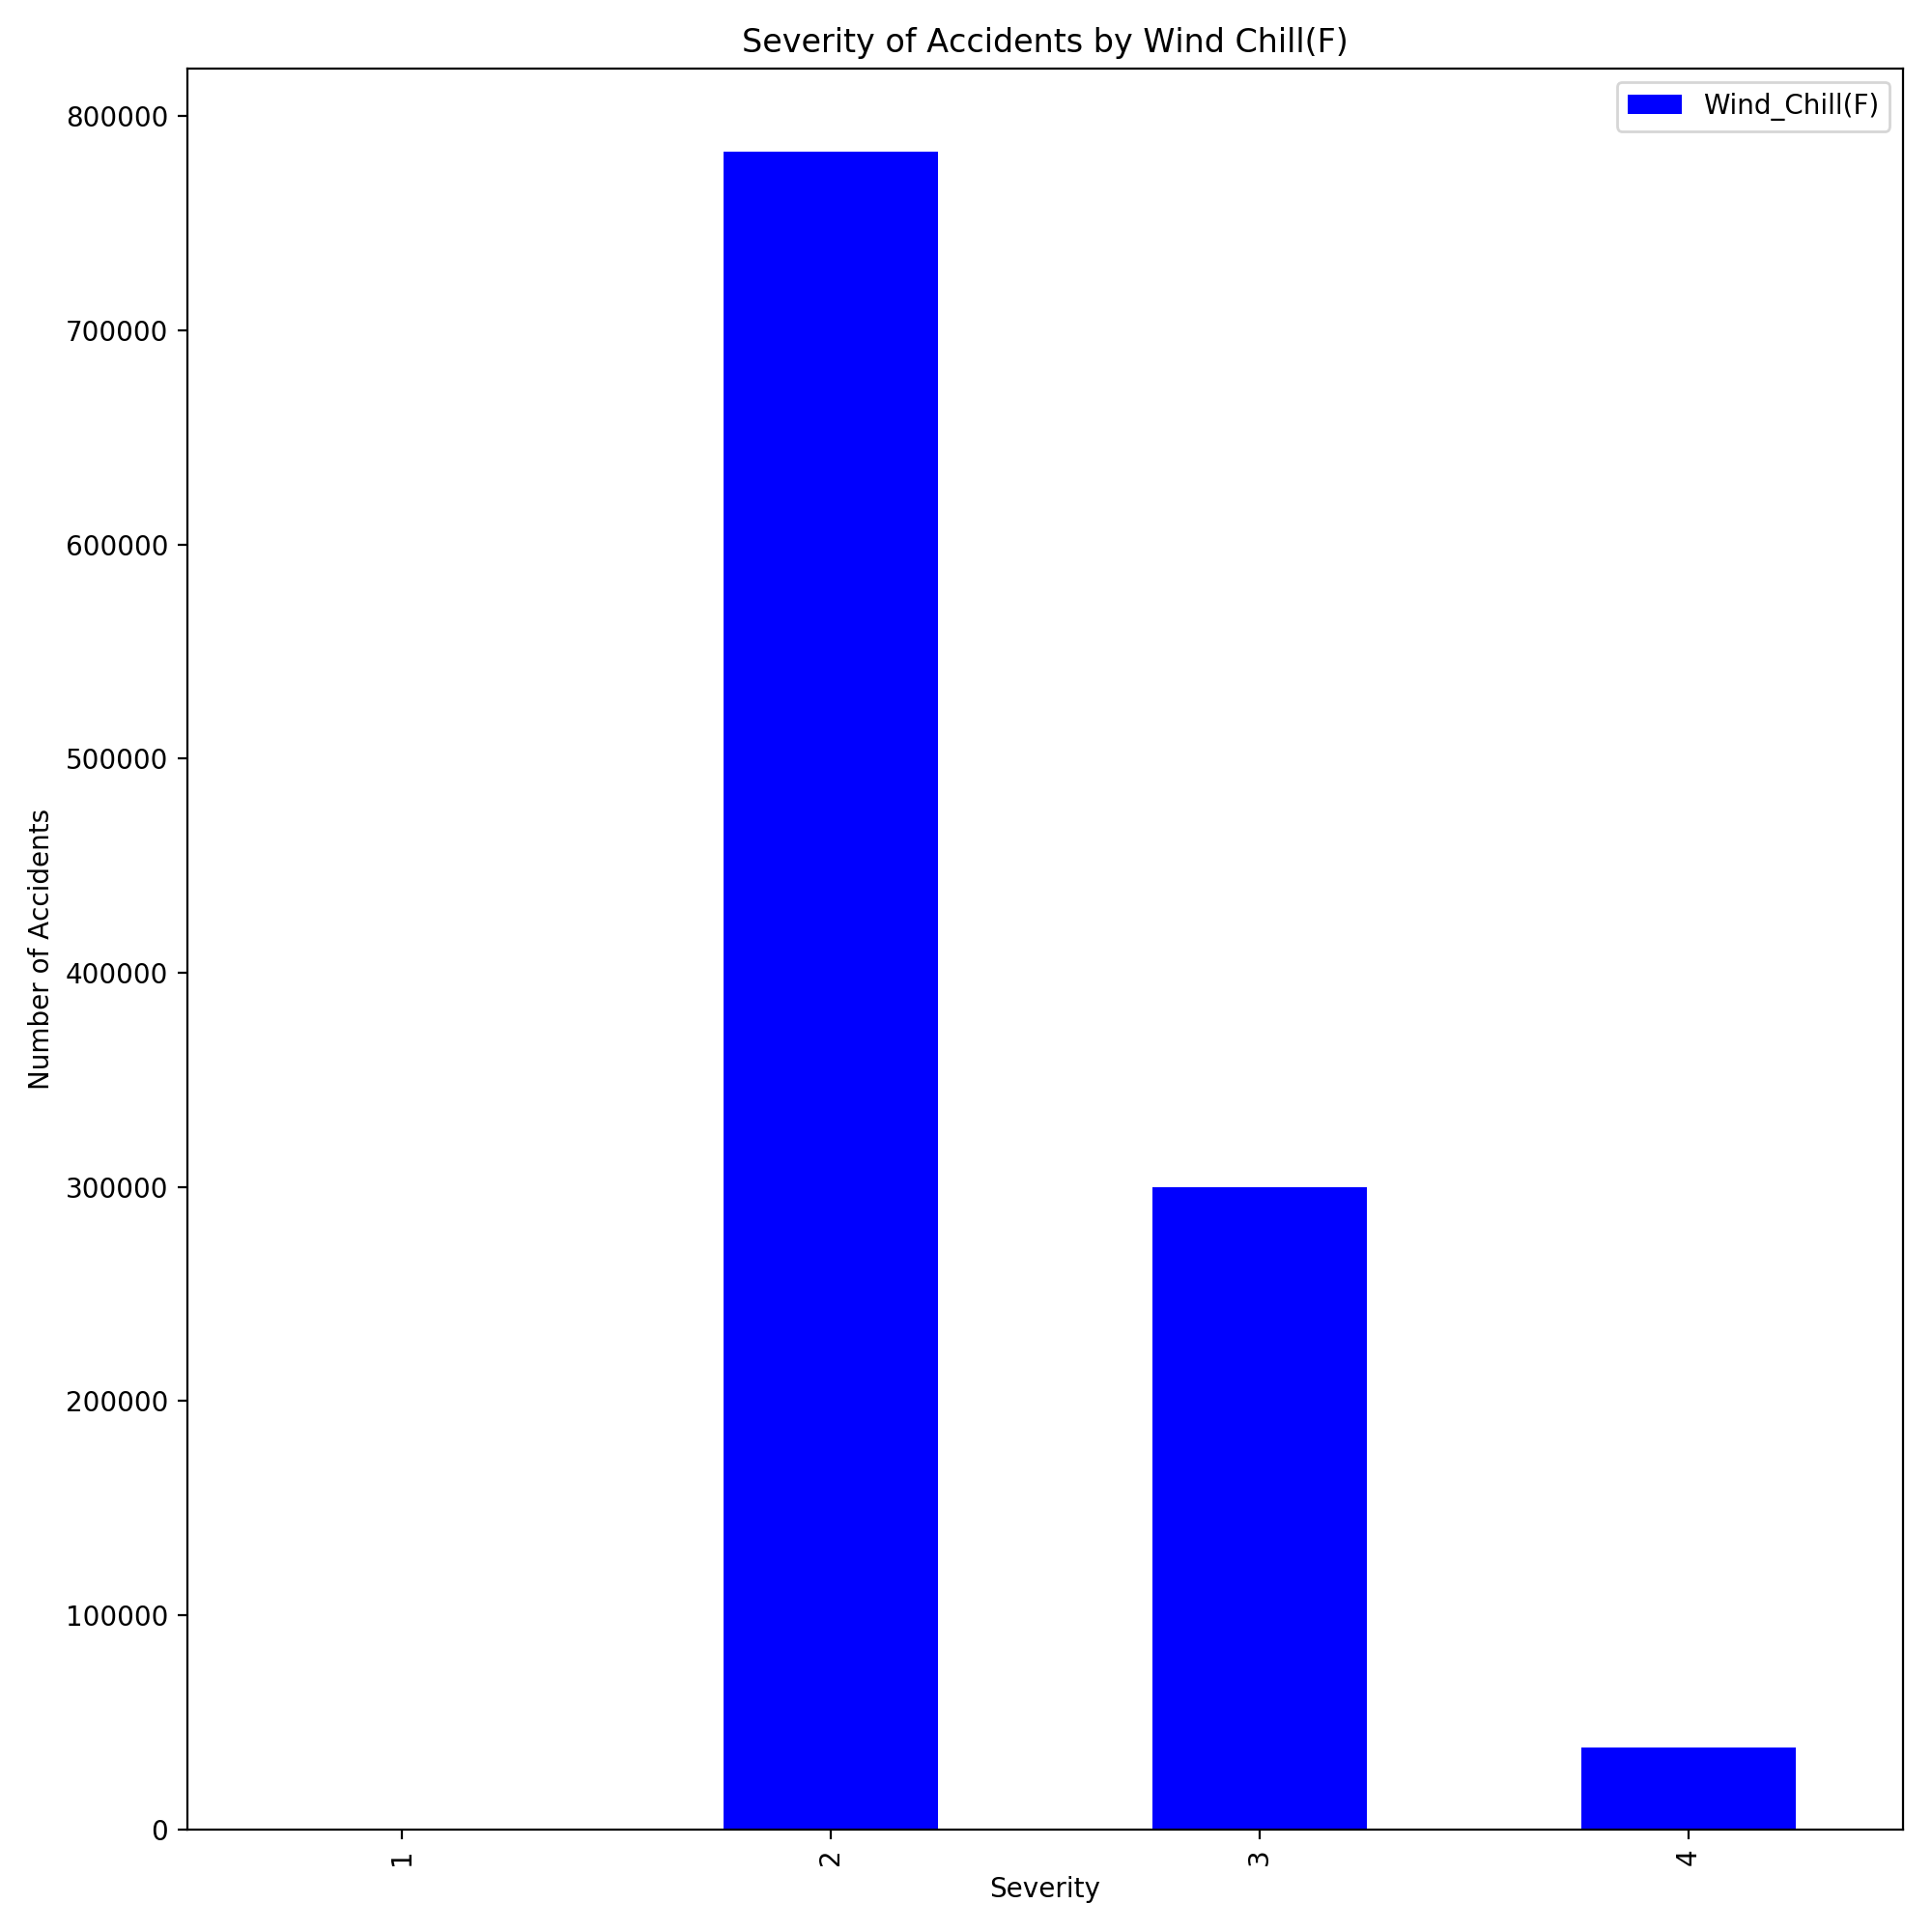

In [143]:
wind_chill.plot(kind="bar", color="b", title="Severity of Accidents by Wind Chill(F)", figsize=(10, 10))
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.savefig('/Users/kelbywilson/Desktop/team_4_project/output/Severity_of_Accidents_by_Wind_Chill(F).png')
plt.show()


In [140]:
from scipy.stats import linregress

<IPython.core.display.Javascript object>


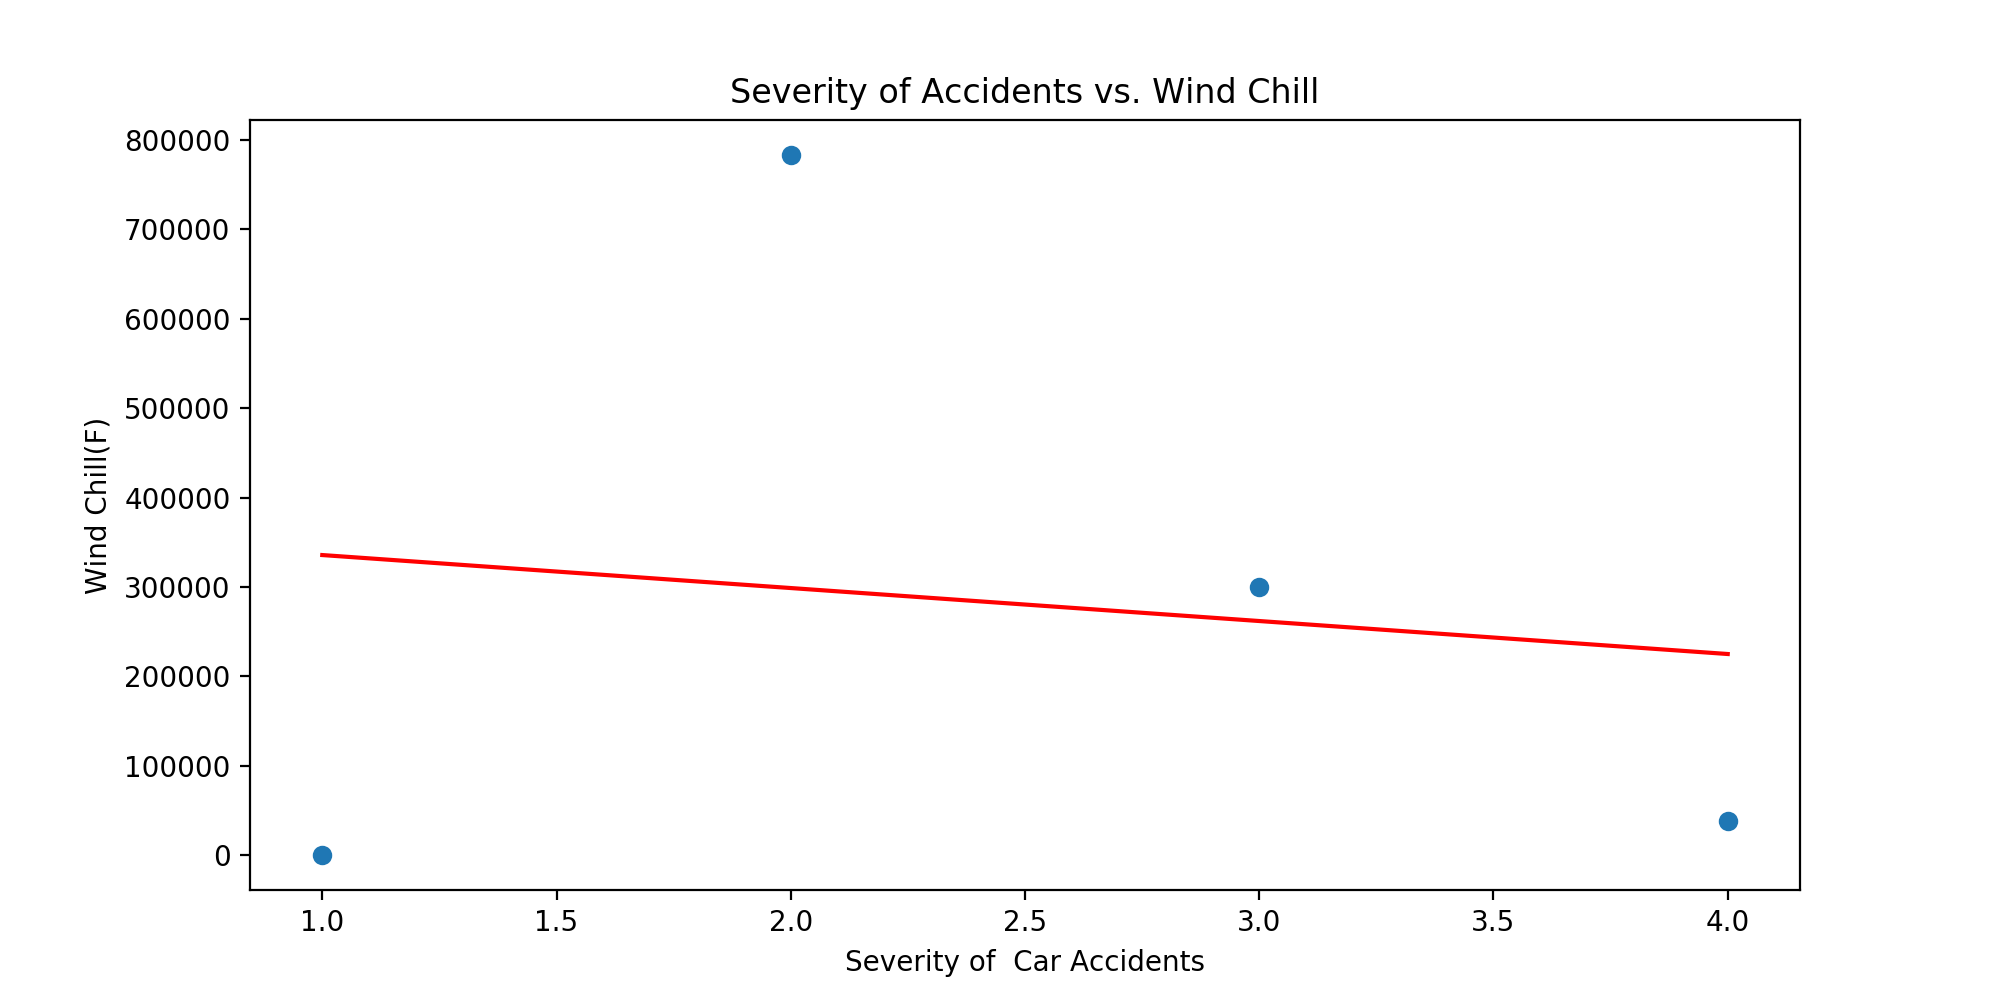

The r-squared is: -0.13207633815224823


In [142]:
x_values = weather_data["Severity"]
y_values = weather_data["Wind_Chill(F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Severity of Accidents vs. Wind Chill")
plt.xlabel('Severity of  Car Accidents')
plt.ylabel('Wind Chill(F)')
print(f"The r-squared is: {rvalue}")
plt.savefig('/Users/kelbywilson/Desktop/team_4_project/output/Severity_of_Accidents_vs._Wind Chill_linreg.png')
plt.show()

In [149]:
weather_data = pd.DataFrame(weather_data.groupby(["Severity"]).count()).reset_index()
temp_sev = weather_data[["Severity","Temperature(F)"]]
temp_sev = temp_sev.set_index("Severity")
temp_sev

,Temperature(F)
Severity,
1,1
2,1
3,1
4,1


<IPython.core.display.Javascript object>


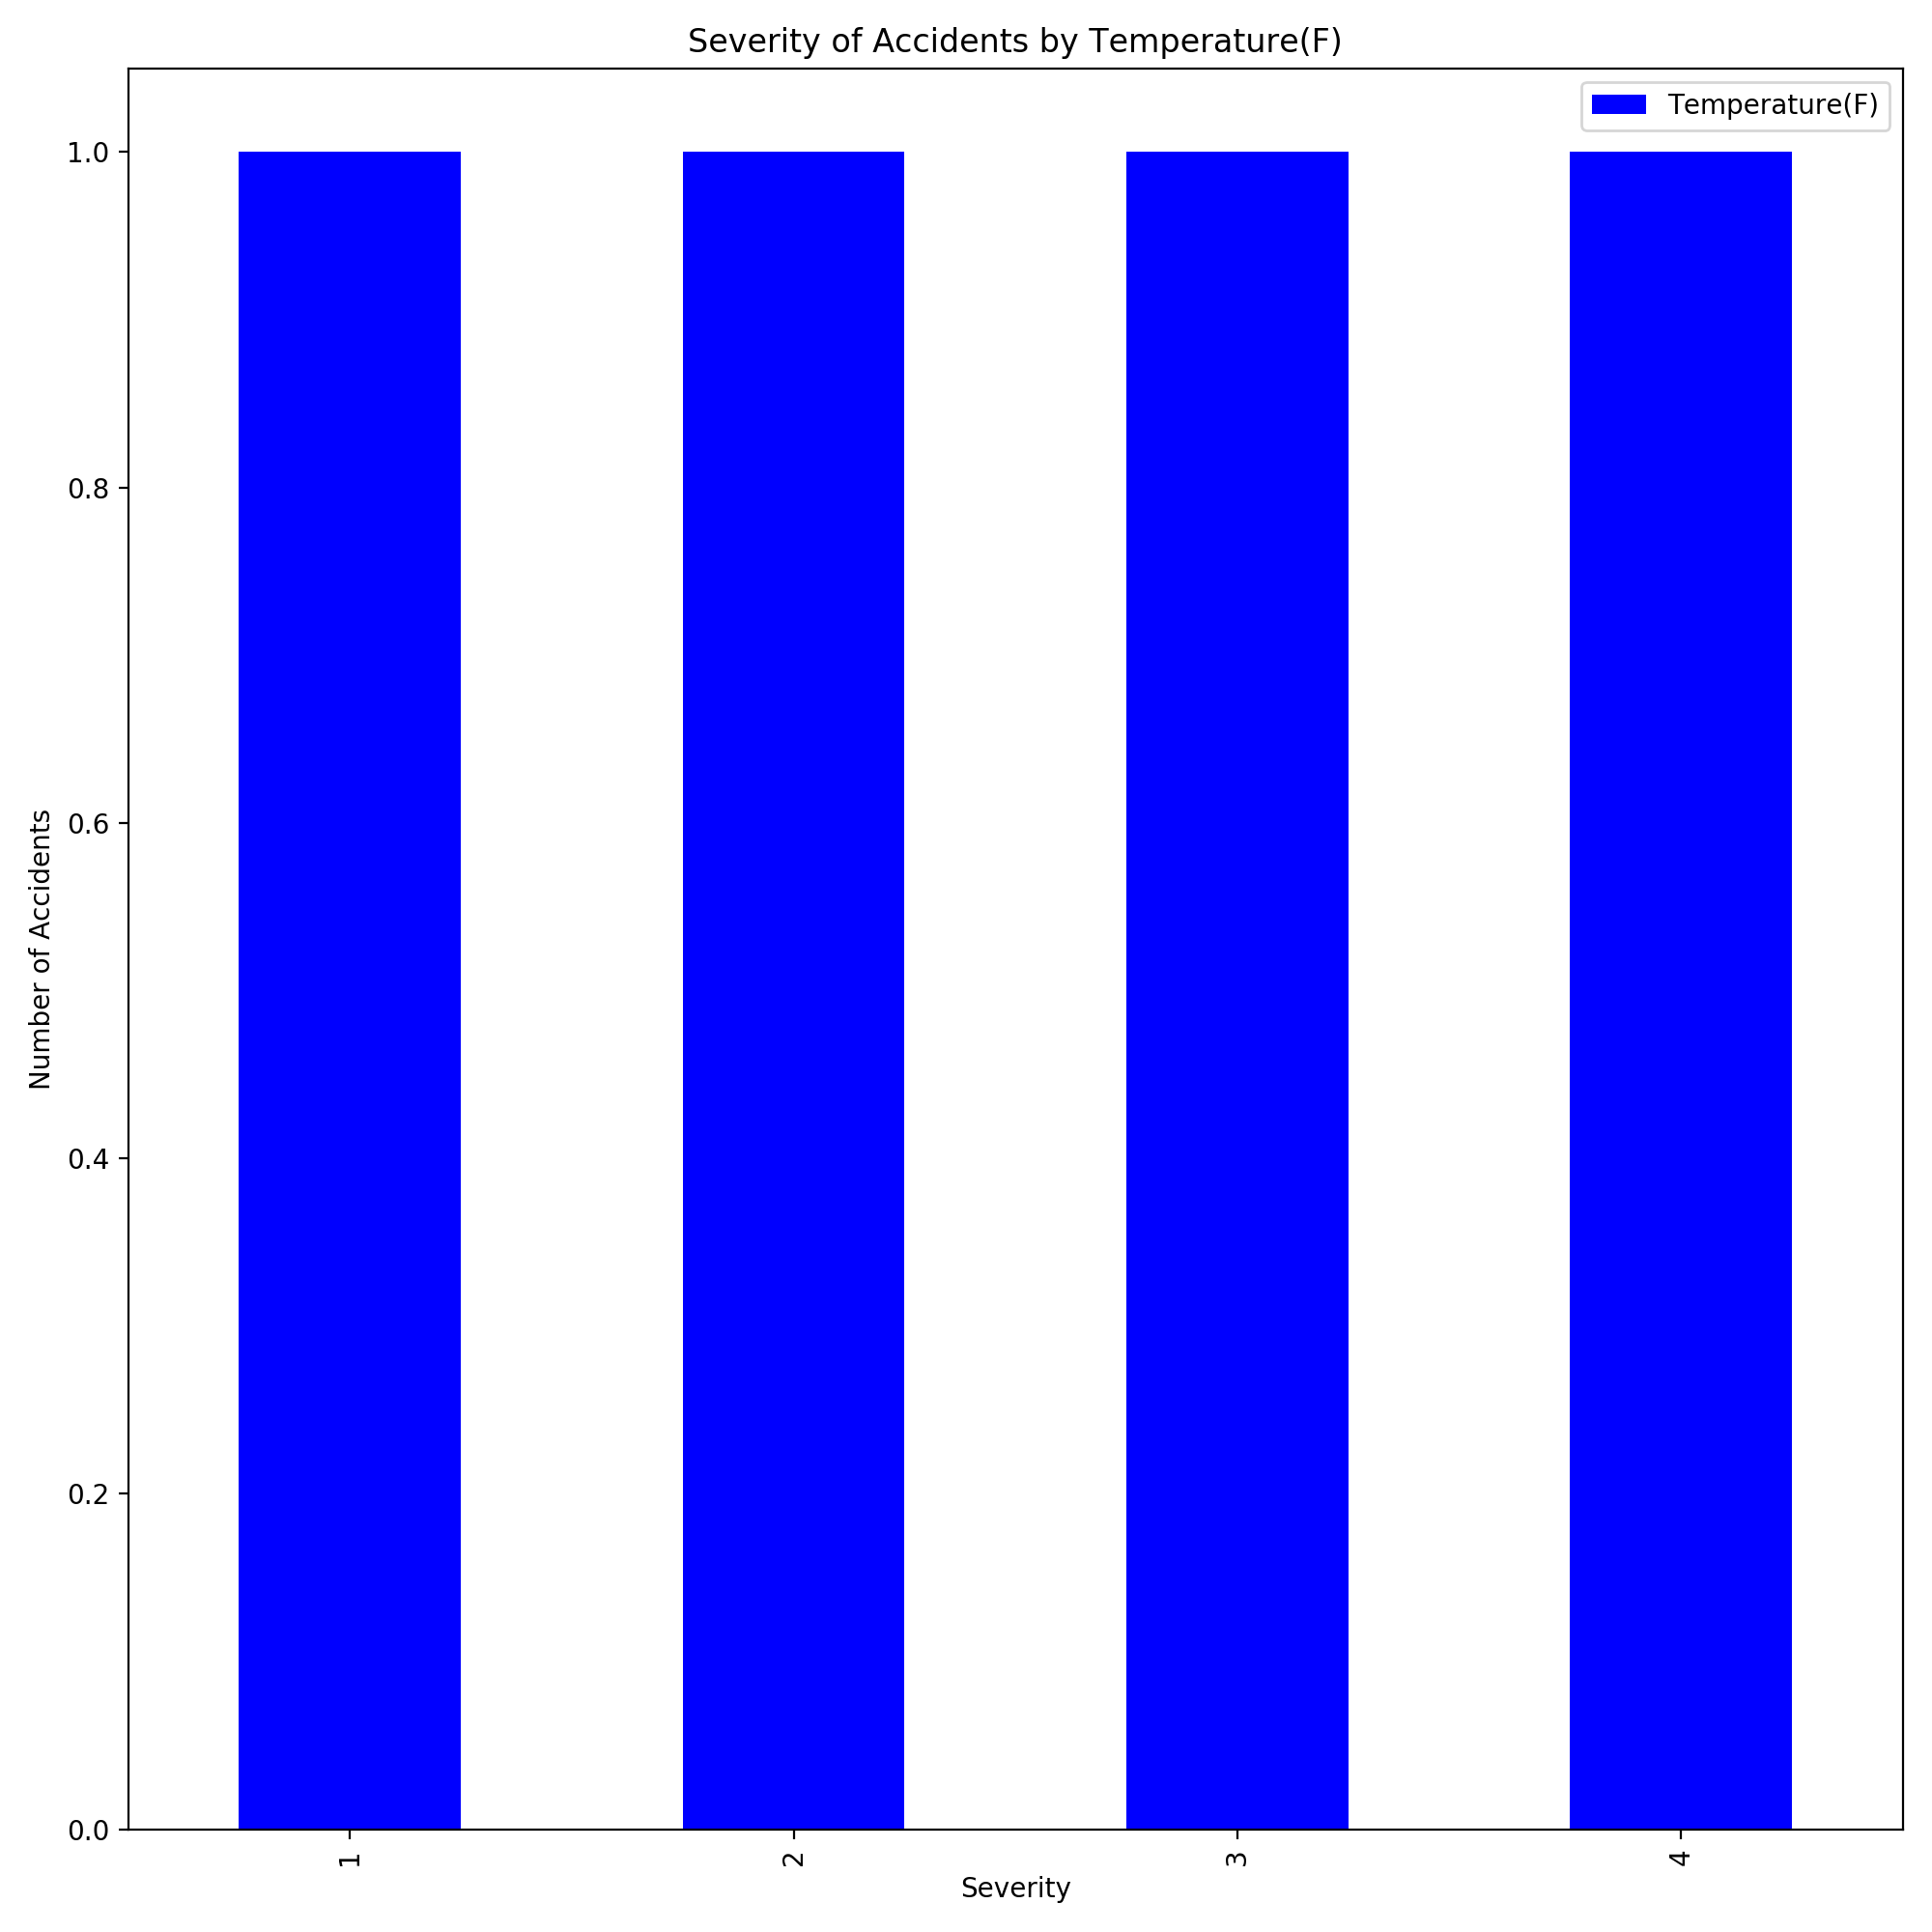

In [148]:
temp_sev.plot(kind="bar", color="b", title="Severity of Accidents by Temperature(F)", figsize=(10, 10))
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.savefig('/Users/kelbywilson/Desktop/team_4_project/output/Severity_of_Accidents_by_Temperature.png')
plt.show()


<IPython.core.display.Javascript object>


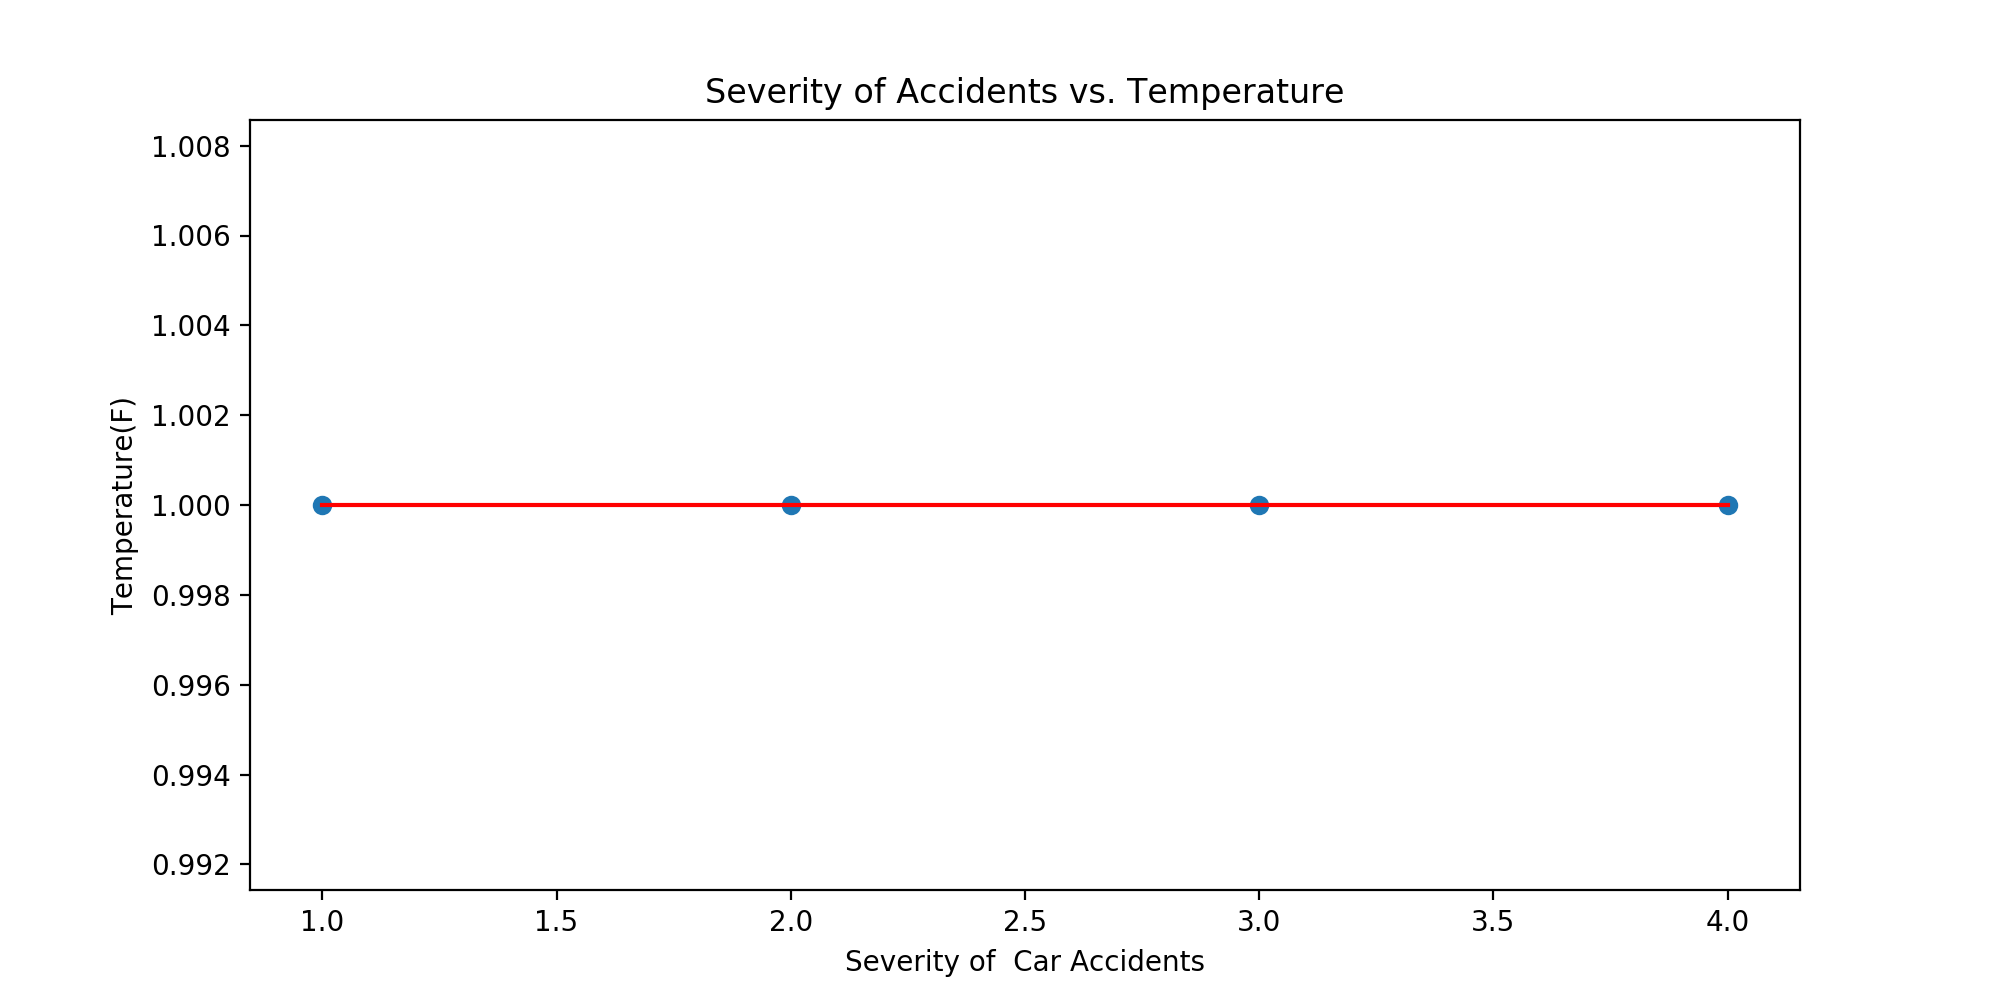

The r-squared is: 0.0


In [152]:
x_values = weather_data["Severity"]
y_values = weather_data["Temperature(F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Severity of Accidents vs. Temperature")
plt.xlabel('Severity of  Car Accidents')
plt.ylabel('Temperature(F)')
print(f"The r-squared is: {rvalue}")
plt.savefig('/Users/kelbywilson/Desktop/team_4_project/output/Severity_of_Accidents_vs._Temperature_linreg.png')
plt.show()

In [ ]:
# Conclusions- No statiscally significant relationship was found between the variables. Accept the null hypotheses.